In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
data = pd.DataFrame(data = iris.data,columns = iris.feature_names)

In [5]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# data = data.iloc[:,2:]    # Run this line only once to drop colums 1-2
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


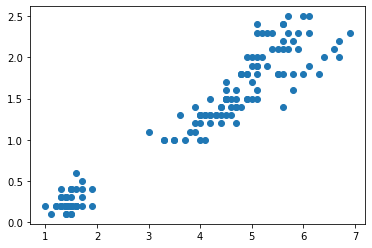

In [8]:
plt.scatter(data['petal length (cm)'],data['petal width (cm)'])

In [9]:
data = data.drop(['sepal length (cm)','sepal width (cm)'],axis=1)

In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [12]:
prediction = km.fit_predict(data.iloc[:,:1],data.iloc[:,1:])

In [13]:
prediction
km.cluster_centers_

array([[4.33965517],
       [1.462     ],
       [5.68809524]])

In [14]:
data['cluster'] = prediction

In [15]:
data.head(2)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1


In [37]:
# km.cluster_centers_

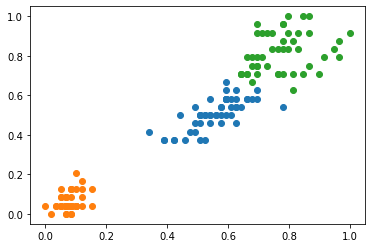

In [38]:
df0 = data[data.cluster == 0]
df1 = data[data.cluster == 1]
df2 = data[data.cluster == 2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='cyan',marker='s',label='centroid')


plt.savefig('img1.jpg',dpi=1000)

In [19]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(data[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\kaushal prajapat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 13.91690875790876,
 11.057257664362925,
 9.26707374992158,
 7.727404401154404,
 6.622500000000002]

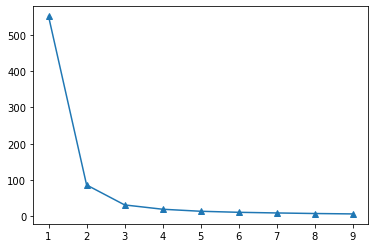

In [21]:
plt.plot(k_range,sse,marker='^')

In [22]:
# N_CLUSTER value should be 3

# Scalling Data for better Results

In [26]:
scaler = MinMaxScaler()
scaler.fit(data[['petal length (cm)']])
data['petal length (cm)'] = scaler.transform(data[['petal length (cm)']])

In [27]:

scaler.fit(data[['petal width (cm)']])
data['petal width (cm)'] = scaler.transform(data[['petal width (cm)']])

In [28]:
data.head(3)

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1


In [29]:
kmm = KMeans(n_clusters=3)

In [30]:
pre = kmm.fit_predict(data[['petal length (cm)','petal width (cm)']])

In [31]:
data['cluster'] = pre

In [32]:
data.head(2)

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1


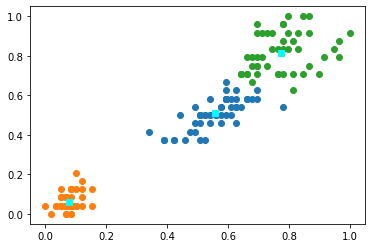

In [35]:
df0 = data[data.cluster == 0]
df1 = data[data.cluster == 1]
df2 = data[data.cluster == 2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])
# plt.scatter()
plt.scatter(kmm.cluster_centers_[:,0],kmm.cluster_centers_[:,1],color='cyan',marker='s',label='centroid')
plt.savefig('img2',dpi=1000)

In [34]:
kmm.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])